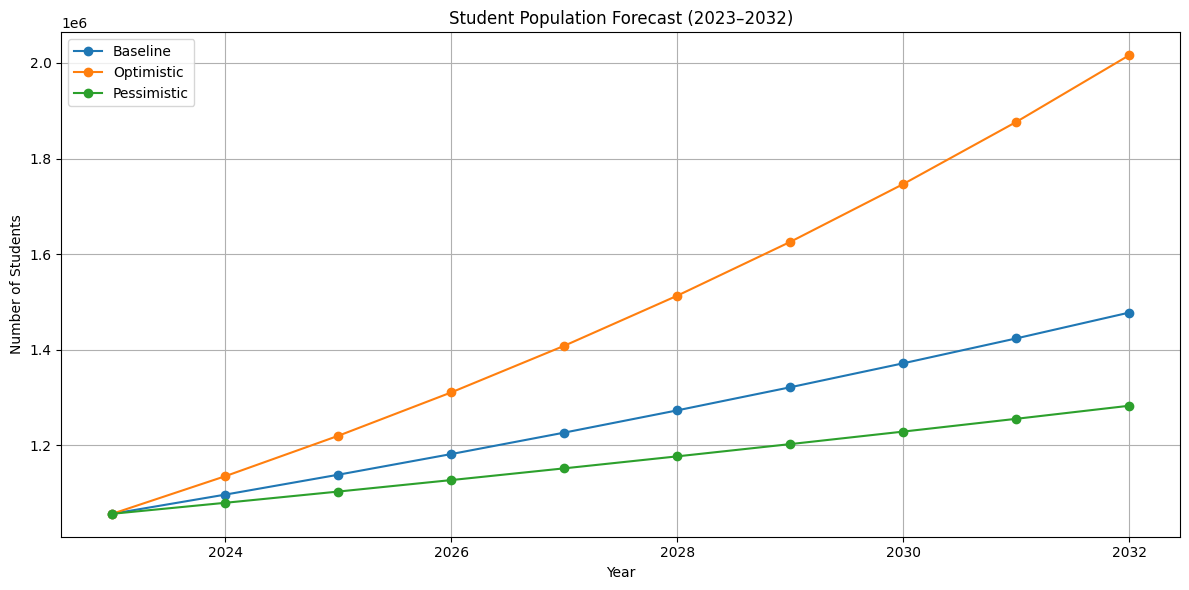

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/sample_data/Yearly_Opti_Pessi_Data.csv")

# Get the last known year and student count
last_known_year = df["Year"].max()
last_known_students = df.loc[df["Year"] == last_known_year, "Students"].values[0]

# Calculate historical growth rate statistics
avg_growth_rate = df["Student_Growth_Rate(%)"].mean()
optimistic_growth_rate = df["Student_Growth_Rate(%)"].quantile(0.75)
pessimistic_growth_rate = df["Student_Growth_Rate(%)"].quantile(0.25)

# Forecasting years
forecast_years = list(range(2023, 2033))

# Initialize projections
baseline = [last_known_students]
optimistic = [last_known_students]
pessimistic = [last_known_students]

# Generate forecasts
for _ in forecast_years[1:]:
    baseline.append(baseline[-1] * (1 + avg_growth_rate / 100))
    optimistic.append(optimistic[-1] * (1 + optimistic_growth_rate / 100))
    pessimistic.append(pessimistic[-1] * (1 + pessimistic_growth_rate / 100))

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_years, baseline, label='Baseline', marker='o')
plt.plot(forecast_years, optimistic, label='Optimistic', marker='o')
plt.plot(forecast_years, pessimistic, label='Pessimistic', marker='o')
plt.title('Student Population Forecast (2023–2032)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
forecast_df.to_excel("Forecasted_BOP.xlsx", index=False)